### Sales Analysis


#### Import Required Libraries 

In [1]:
import pandas as pd
import os

In [2]:
# df = pd.read_csv('./Sales Data/Sales_April_2019.csv')


all_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales Data')]

for file in files:
    df = pd.read_csv('./Sales Data/'+ file)
    all_data = pd.concat([all_data,df],axis = 0)




In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


#### Removing Null Values and Duplicates

In [6]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data = all_data.dropna().reset_index()

In [8]:
all_data.duplicated().sum()

1

In [9]:
all_data.drop(columns = ['index'],axis=1,inplace= True)

In [10]:
all_data = all_data.drop_duplicates()

In [11]:
all_data.drop(index = 517,inplace = True)

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')

In [13]:
all_data[all_data['Month'] == 'Or'].index

Index([], dtype='int64')

In [14]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [15]:
all_data['sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [16]:
def city_state(x):
    y = x.split(',')[1]
    re = x.split(',')[2]
    y = y + ',' + re[:3]
    return y
    
    

In [17]:
all_data['Address'] = all_data['Purchase Address'].apply(lambda x : city_state(x) )

In [18]:
all_data['Address'] =all_data['Purchase Address'].str.split(',')
all_data['Address'] = all_data['Address'].str[1] 

### Visualization and Analysis

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Display the total sales for each month 

In [21]:
Overall_sales = all_data.groupby('Month')['sales'].sum()
Overall_sales

months = Overall_sales.index
months

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Month')

<Axes: xlabel='Month', ylabel='sales'>

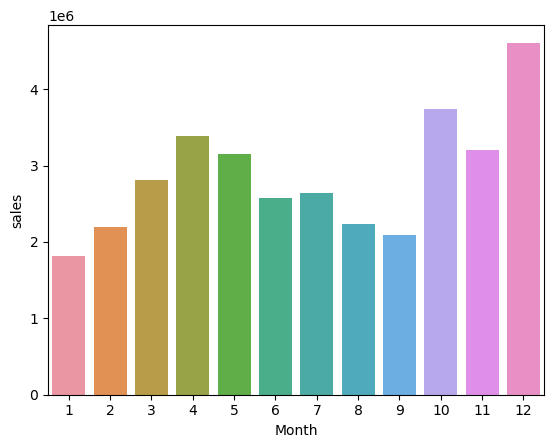

In [22]:
sns.barplot( x = months,y = Overall_sales)

In [23]:
city = all_data.groupby('Address')['sales'].sum().sort_values()
print(city)

address = city.index
print(address)

Address
 Austin           1818044.33
 Portland         2319331.94
 Seattle          2745046.02
 Dallas           2765373.96
 Atlanta          2794199.07
 Boston           3658627.65
 New York City    4661867.14
 Los Angeles      5448304.28
 San Francisco    8254743.55
Name: sales, dtype: float64
Index([' Austin', ' Portland', ' Seattle', ' Dallas', ' Atlanta', ' Boston',
       ' New York City', ' Los Angeles', ' San Francisco'],
      dtype='object', name='Address')


<Axes: xlabel='Address', ylabel='sales'>

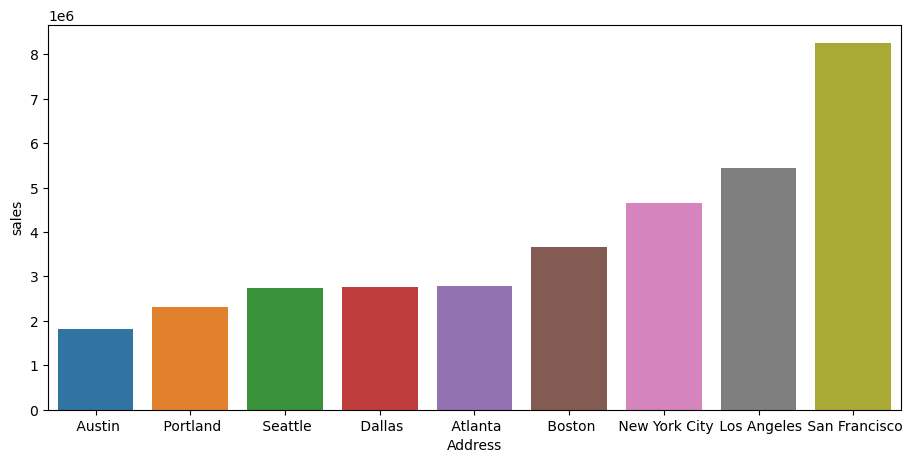

In [24]:
plt.figure(figsize=[11,5])
sns.barplot(x=address,y=city)

#### What would be the best time to display adds to catch more customers?

In [25]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\navee\AppData\Local\Temp\ipykernel_6532\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [26]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [27]:
hours = all_data.groupby('Hour')['Hour'].count()


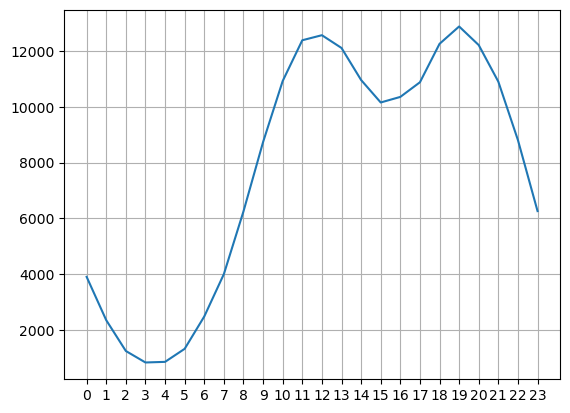

In [28]:
plt.plot(hours.index,hours)
plt.grid()
plt.xticks(hours.index)
plt.show()

1. Time like 12 p.m. and 7 p.m. are the time when most people seem to be active and placing orders, so these times are best to display adds to catch more attention from the customers. 

#### What products are most often sold together?

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Address,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [34]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df

C:\Users\navee\AppData\Local\Temp\ipykernel_6532\2555456646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Address,Hour,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
186248,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186260,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186296,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [41]:
df = df[['Order ID','Grouped']].drop_duplicates()

In [42]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for a,b in count.most_common(10):
    print(a,b)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What products are sold most? Why do you think it sold most?

In [46]:
all_data.groupby('Product')['Product'].count().sort_values(ascending = False)

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

1. The most sold products are mostly related to mobile/Laptop devices
2. These products are used frequently and can easily get damaged or lost due to its small size, reasons like this are seem to be the main contribution for sales of these top products.  